# Learning Objectives

Social scientists, like natural scientists, use experiments to study human behavior under controlled conditions, helping isolate the effects of specific changes. Economists use such experiments to examine how people contribute to public goods. A major issue with public goods is the problem of "free riding," where individuals benefit without contributing.

Despite this, successful real-world examples exist, and reasons for sustained contributions may include concern for others, social norms, or fear of punishment. [Herrmann, Thöni, and Gächter (2008)](https://www.umass.edu/preferen/You%20Must%20Read%20This/herrmann-thoni-gachter.pdf) tested this using two public goods experiments:

- Experiment 1: Participants received $20 and were grouped randomly. They chose how much to contribute to a shared pool, which benefited everyone equally.

- Experiment 2: Same as the first, but participants could pay to anonymously punish others who contributed less.

The project aims to collect and analyze similar data to explore whether the option to punish affects contributions and whether behavior changes are due to this change rather than chance.

---

# Getting started with Python

In [194]:
# Install non-built in colab packages
# To hide the code cell outputs we use the following:
# %%capture ## Uncomment in Google Colab
# %pip install lets_plot

In [195]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from scipy import stats
from lets_plot import *

LetsPlot.setup_html()

LetsPlot.setup_html(no_js=True)

plt.style.use(

    "https://raw.githubusercontent.com/aeturrell/core_python/main/plot_style.txt"
)

--- 

# Part 2.1 Collecting data by playing a public goods game

---

# Part 2.2 Describing the data

In [196]:
data_np = pd.read_excel(
    "./doing-economics-datasets/doing-economics-datafile-working-in-excel-project-2.xlsx",
    usecols="A:Q",
    header=1,
    index_col="Period",
)

# we use .copy() to allocate new memory and avoid creating a pointer.
data_n = data_np.iloc[:10, :].copy() # Without punishment
data_p = data_np.iloc[14:24, :].copy() # With punishment

C:\Users\atila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [197]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Copenhagen       10 non-null     object
 1   Dnipropetrovs’k  10 non-null     object
 2   Minsk            10 non-null     object
 3   St. Gallen       10 non-null     object
 4   Muscat           10 non-null     object
 5   Samara           10 non-null     object
 6   Zurich           10 non-null     object
 7   Boston           10 non-null     object
 8   Bonn             10 non-null     object
 9   Chengdu          10 non-null     object
 10  Seoul            10 non-null     object
 11  Riyadh           10 non-null     object
 12  Nottingham       10 non-null     object
 13  Athens           10 non-null     object
 14  Istanbul         10 non-null     object
 15  Melbourne        10 non-null     object
dtypes: object(16)
memory usage: 1.3+ KB


In [198]:
data_p.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Copenhagen       10 non-null     object
 1   Dnipropetrovs’k  10 non-null     object
 2   Minsk            10 non-null     object
 3   St. Gallen       10 non-null     object
 4   Muscat           10 non-null     object
 5   Samara           10 non-null     object
 6   Zurich           10 non-null     object
 7   Boston           10 non-null     object
 8   Bonn             10 non-null     object
 9   Chengdu          10 non-null     object
 10  Seoul            10 non-null     object
 11  Riyadh           10 non-null     object
 12  Nottingham       10 non-null     object
 13  Athens           10 non-null     object
 14  Istanbul         10 non-null     object
 15  Melbourne        10 non-null     object
dtypes: object(16)
memory usage: 1.3+ KB


All of the columns are stored as "object" since Python does not know which data type to use for them.

In [199]:
data_n = data_n.astype("double")
data_p = data_p.astype("double")

In [200]:
data_n.head(3)

,Copenhagen,Dnipropetrovs’k,Minsk,St. Gallen,Muscat,Samara,Zurich,Boston,Bonn,Chengdu,Seoul,Riyadh,Nottingham,Athens,Istanbul,Melbourne
Period,,,,,,,,,,,,,,,,
1,14.102941,10.954545,12.7941,13.687500,9.53846,10.8421,11.0833,12.9643,10.850000,10.0000,8.250000,7.958333,10.928571,8.136364,8.937500,8.225
2,14.132353,12.636363,12.3382,12.802067,10.98080,11.5000,12.1667,12.7143,10.800000,9.9625,9.142857,7.729167,10.535714,6.272727,9.015625,7.325
3,13.720588,12.068182,12.5882,12.354184,11.51920,11.7237,10.7813,12.7143,11.516667,10.2250,9.892857,7.187500,9.125000,6.409091,8.437500,6.250


In [201]:
data_p.head(3)

,Copenhagen,Dnipropetrovs’k,Minsk,St. Gallen,Muscat,Samara,Zurich,Boston,Bonn,Chengdu,Seoul,Riyadh,Nottingham,Athens,Istanbul,Melbourne
Period,,,,,,,,,,,,,,,,
1,15.411765,9.477273,11.750000,15.041667,9.211538,10.763158,13.228261,16.017857,12.050000,9.895833,9.690476,6.145833,11.321428,5.818182,6.546875,7.850
2,16.970589,9.909091,13.235294,16.718750,10.307693,11.302631,15.021739,17.821428,13.466666,11.062500,12.107142,6.770833,13.892858,5.636364,6.578125,10.475
3,17.735294,11.840909,12.897058,17.572916,10.057693,11.743421,15.771739,18.553572,14.083333,12.312500,13.273809,6.708333,14.696428,5.863636,6.718750,12.800


In [202]:
mean_n_c = data_n.mean(axis = 1)
mean_p_c = data_p.mean(axis = 1)

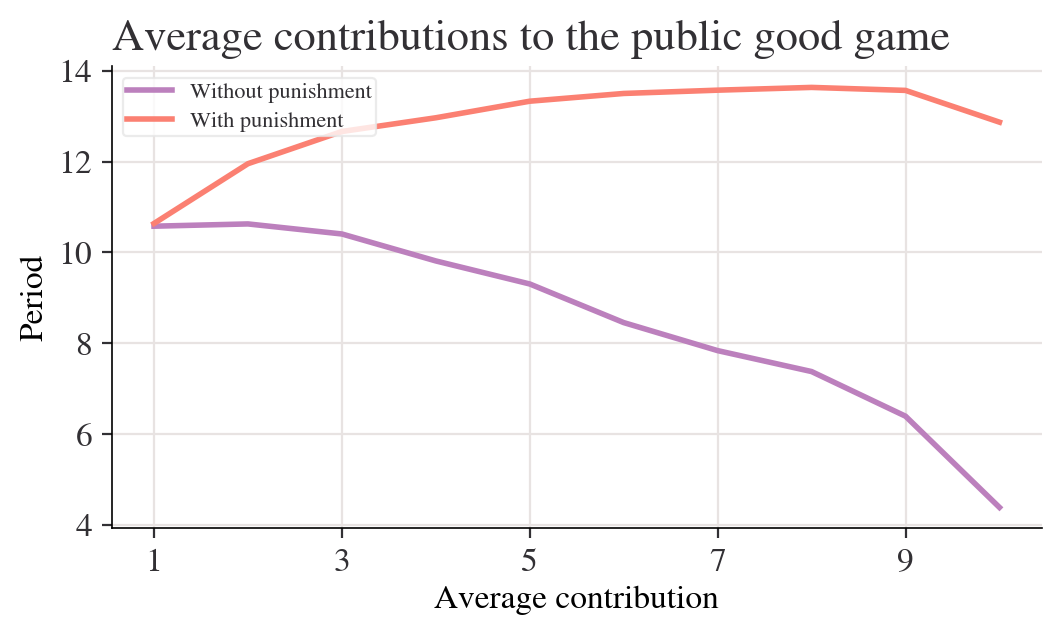

In [203]:
fig, ax = plt.subplots(dpi = 200)

mean_n_c.plot(ax = ax, label = "Without punishment")
mean_p_c.plot(ax = ax, label = "With punishment")

ax.set_title(
    "Average contributions to the public good game"
)

ax.set_xlabel("Average contribution")
ax.set_ylabel("Period")

ax.legend()
plt.show();

Instead of looking at all periods, we can focus on contribution in the first and last period. We plot a column chart to visualize the contributions in the first and last period for both experiments.

In [204]:
mean_first_last_n = mean_n_c.loc[[1, 10]]
mean_first_last_p = mean_p_c.loc[[1, 10]]

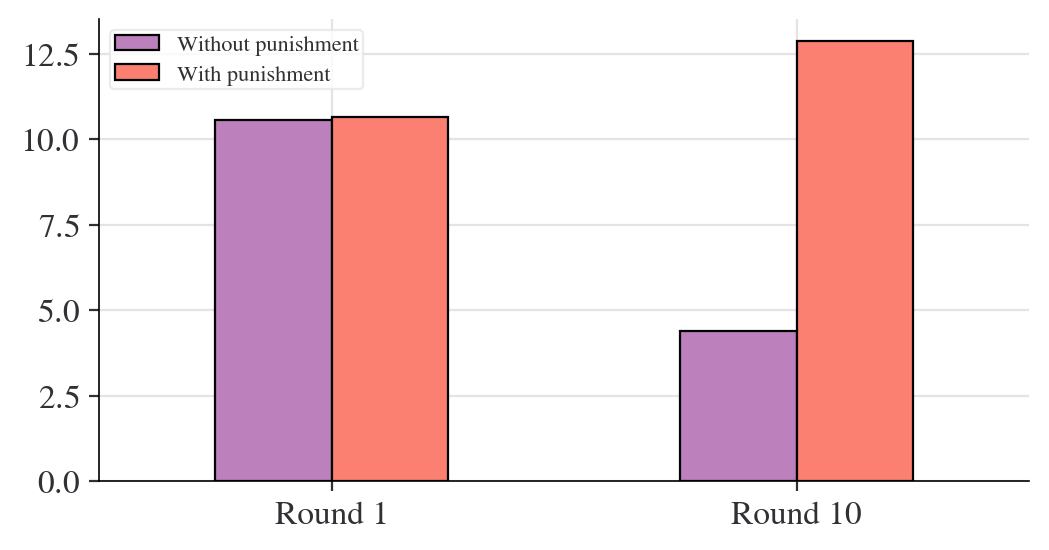

In [205]:
compare_groups = pd.DataFrame(
    [mean_first_last_n, mean_first_last_p],
    index=["Without punishment", "With punishment"]
)

# Using list comprehension to have 'round' in column names
compare_groups.columns = ["Round " + str(i) for i in compare_groups.columns]

fig, ax = plt.subplots(dpi=200)
compare_groups.T.plot.bar(rot=0, ax=ax)

plt.show();

### Recall: Numerical Descriptive Measures
The mean that we have already used in our analysis is a measure of central tendency which is the extent to which the data values group around a central value. 


$$Mean = \bar{X} = \frac{1}{N} \sum_{i=1}^{N} x_i
$$

Generally, the mean is a good measure of central tendency, however it can be affected by very low or very high values (outliers)

Additionaly, often we want to see the dispersion of the data around the mean, in this case we use variance which is a measure of variation.

$$Var(X) = \frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})^2$$

The standard deviation is also simply the square root of the variance and is commonly used.

A rule of thumb states that in a normal distribution about 95% of the data will be less than two standard deviations away form the mean.

Now let's compute the standard deviation for periods 1 and 10 for both experiments.

In [206]:
n_c = data_n.agg(["std", "var", "mean"], 1)
n_c

,std,var,mean
Period,,,
1,2.020724,4.083325,10.578313
2,2.238129,5.009220,10.628398
3,2.329569,5.426891,10.407079
4,2.068213,4.277504,9.813033
5,2.108329,4.445049,9.305433
6,2.240881,5.021549,8.454844
7,2.136614,4.565117,7.837568
8,2.349442,5.519880,7.376388
9,2.413845,5.826645,6.392985


In [207]:
p_c = data_p.agg(["std", "var", "mean"], 1)
p_c

,std,var,mean
Period,,,
1,3.207258,10.286506,10.638759
2,3.700410,13.693032,11.954794
3,3.883751,15.083518,12.664337
4,3.857860,14.883086,12.966662
5,3.946699,15.576430,13.331636
6,4.081441,16.658160,13.502236
7,4.290263,18.406356,13.574680
8,4.335416,18.795833,13.635535
9,4.466409,19.948807,13.569548


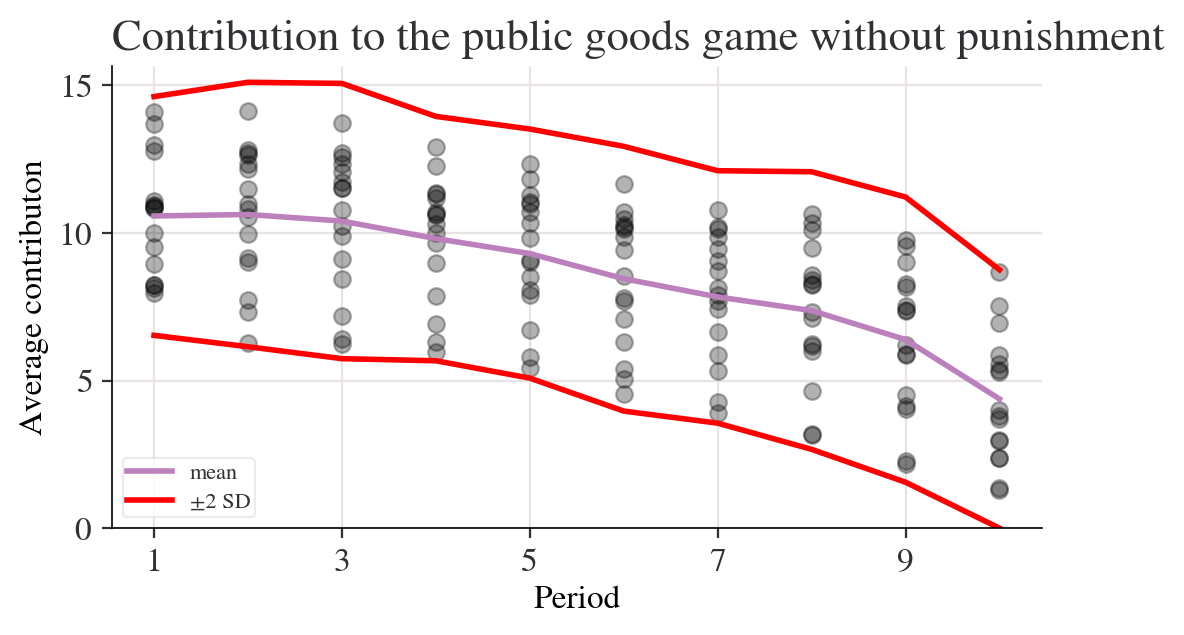

In [208]:
fig, ax = plt.subplots(dpi=200)

n_c["mean"].plot(ax = ax, label = "mean")
(n_c["mean"] + 2 * n_c["std"]).plot(ax = ax, ylim = (0, None), color = "red", label = "±2 SD")
(n_c["mean"] - 2 * n_c["std"]).plot(ax = ax, ylim = (0, None), color = "red")

for i in range(len(data_n.columns)):
    ax.scatter(x = range(len(data_p.index)), y = data_n.iloc[:, i], color = "k", alpha = 0.3)

ax.legend(loc = "lower left")
ax.set_ylabel("Average contributon")
ax.set_title("Contribution to the public goods game without punishment")
plt.show();

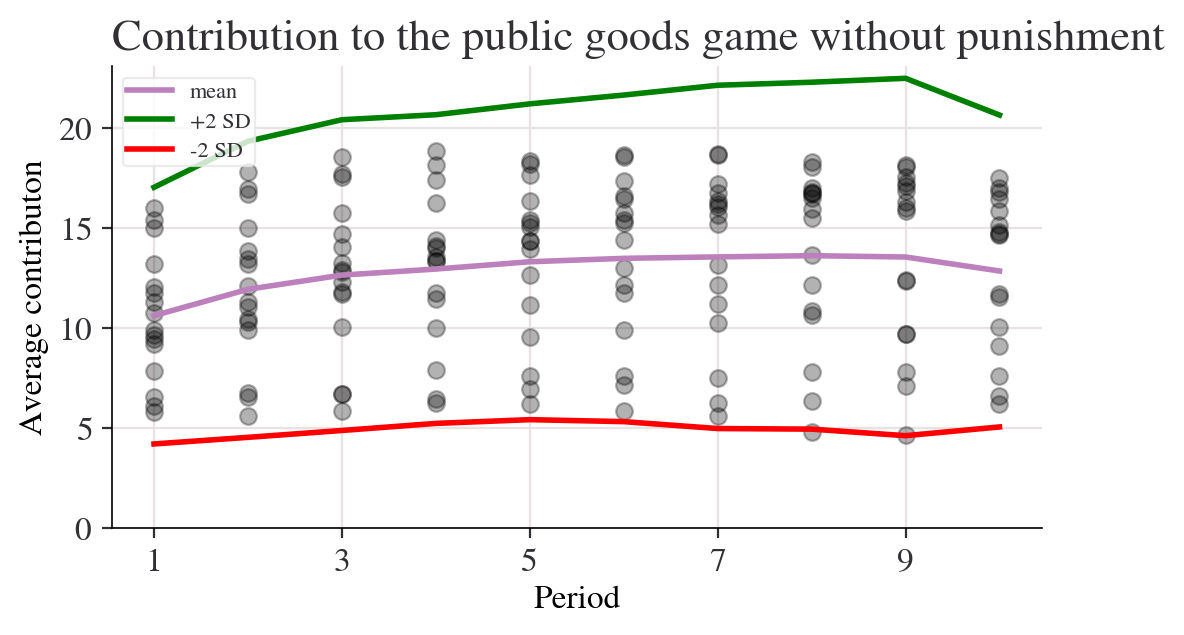

In [209]:
fig, ax = plt.subplots(dpi=200)

p_c["mean"].plot(ax = ax, label = "mean")
(p_c["mean"] + 2 * p_c["std"]).plot(ax = ax, ylim = (0, None), color = "green", label = "+2 SD")
(p_c["mean"] - 2 * p_c["std"]).plot(ax = ax, ylim = (0, None), color = "red", label = "-2 SD")

for i in range(len(data_n.columns)):
    ax.scatter(x = range(len(data_n.index)), y = data_p.iloc[:, i], color = "k", alpha = 0.3)

ax.legend()
ax.set_ylabel("Average contributon")
ax.set_title("Contribution to the public goods game without punishment")
plt.show();

Another measure of spread is the range, which is the difference between the maximum and minimum values in a dataset.
$$Range(X) = max(X) - min(X)$$

We calculate the range for each period with apply() function and a lambda function that computes the range for each period.

Lambda functions are a way to create small anonymous functions in Python. They are often used for short operations that are not reused elsewhere.

In [210]:
range_function = lambda x: x.max() - x.min()

In [211]:
range_n = data_n.apply(range_function, axis = 1)
range_p = data_p.apply(range_function, axis = 1)

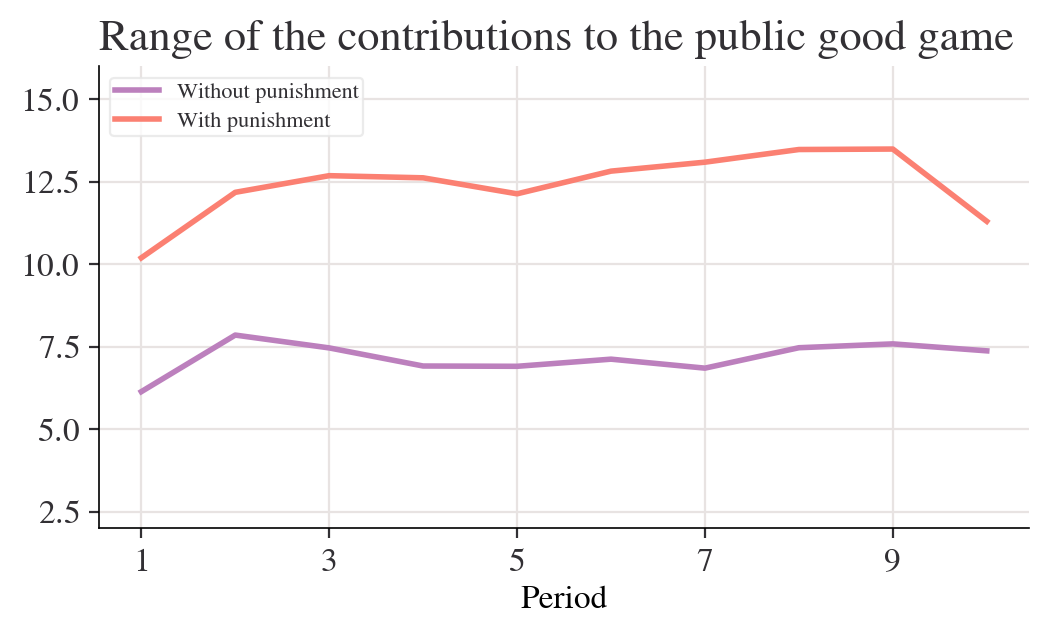

In [212]:
fig, ax = plt.subplots(dpi = 200)

range_n.plot(ax = ax, label = "Without punishment")
range_p.plot(ax = ax, label = "With punishment")

ax.set_title(
    "Range of the contributions to the public good game"
)

ax.set_ylim(2, 16)

ax.set_xlabel("Period")

ax.legend()
plt.show();

Summary table is created to summarize the mean, standard deviation, and range for each period in both experiments.

In [213]:
data_n.agg(["mean", "std", "min", "max", range_function], axis=1).rename(columns={"<lambda>": "range"}).iloc[[0, 9]].round(2)

,mean,std,min,max,range
Period,,,,,
1,10.58,2.02,7.96,14.10,6.14
10,4.38,2.19,1.30,8.68,7.38


In [214]:
data_p.agg(["mean", "std", "min", "max", range_function], axis=1).rename(columns={"<lambda>": "range"}).iloc[[0, 9]].round(2)

,mean,std,min,max,range
Period,,,,,
1,10.64,3.21,5.82,16.02,10.20
10,12.87,3.90,6.20,17.51,11.31


---

# Part 2.3 How did changing the rules of the game affect behaviour?


The punishment option was introduced into the public goods game to see if it could sustain contributions, compared to the game without a punishment option.

We are going to compare the results in round 10 of both experiments, we can see that the mean contribution in the game with the ability to punish the free riders is 8.5 units higher than the other case. 

*Is it more likey that his behaviour is due to chance, or is it more likely to be due to the difference in experimnental conditions?*

To answer this question we use the p-value.

p-value: The probability of observing data at least as extreme as the data collected if a particular hypothesis about the population is true. The p-value ranges from 0 to 1: the lower the probability (the lower the p-value), the less likely it is to observe the given data, and therefore the less compatible the data are with the hypothesis.

The smaller the p-value, the lower the probability that the differences we observe could have happened simply by chance. The smaller the p-value, the stronger the evidence in favour of the alternative hypothesis.

For a two-tailed test, the p-value can be calculated as:

$$\text{p-value} = 2 \times \text{CDF}(-|x|)$$

where $ x $ is the observed test statistic.

The process of formulating a hypothesis about the data, calculating the p-value, and using it to assess whether what we observe is consistent with the hypothesis, is known as a hypothesis test⁠. There are four steps for it:

1. System of hypothesis (null and alternative)
2. Test level alpha (the cutoff point)
3. Test statistic
4. Rejection rule

In [215]:
t_stat, p_val = stats.ttest_rel(data_n.iloc[0], data_p.iloc[0])

print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = -0.14995904535850296
p-value = 0.8827947293072502


The p-value of 0.882 indicates that the difference in contributions between the two experiments is likely due to chance, as it is much higher than the common significance level of 0.05. This suggests that the introduction of the punishment option did not significantly affect contributions in this case.

In [216]:
t_stat, p_val = stats.ttest_rel(data_n.iloc[9], data_p.iloc[9])

print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = -6.48059952973006
p-value = 1.0374516722799413e-05


the p-value of 1.03e-05 indicates that the difference in contributions between the two experiments is very unlikely to be due to chance, as it is much lower than the common significance level of 0.05. This suggests that the introduction of the punishment option had a significant effect on contributions in this case.

Note that p-values cannot help us detect the spurious correlations, however they can help us determine whether there is a causal link between two variables.

To sum up, experiments can be useful for identifying causal links. However, if people’s behaviour in experimental conditions were different from their behaviour in the real world, our results would not be applicable anywhere outside the experiment.

### Are lab experiments a good guide to what people do?

In 2007, Steven Levitt and John List published a paper called ‘What Do Laboratory Experiments Measuring Social Preferences Reveal about the Real World.

According to this paper, people’s behavior in real life can differ from what is observed in laboratory experiments due to some key points:

- First is about moral and ethical considerations, where real-world decisions often involve complex moral dilemmas, which may not be fully replicated in a lab setting.

- Also, the fact that participants are aware that their actions are being monitored or recorded can lead to behavior tailored to perceived expectations. (Scrutiny)

- In real life, where inspection levels vary, individuals may act with less concern about external judgment. 

- Additionally, decisions in the lab are often made in controlled environments, while real-world contexts are dynamic and influenced by diversity. (cultural, relational, etc, factors)

- The other problem would be the lack of randomization and the probability that the participants do not represent the actual population.

- Consequently, these factors suggest that lab findings should be interpreted cautiously, as they may not always generalize well to natural environments. 

---